In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [39]:
import yaml

class parse(object):
    def __init__(self, path):
        with open(path, 'r') as file:
            self.parameters = yaml.safe_load(file)

    def __getitem__(self, key):
        return self.parameters[key]

    def save(self, filename):
        with open(filename, 'w') as f:
            yaml.dump(self.parameters, f)
param = parse('./config/test.yaml')

In [47]:
# class neuron:
#     def __init__(self, init_params):
#         self.time_steps = init_params['time_steps']
#         self.membrane = np.zeros(self.time_steps)
#         self.spike_train = np.zeros(self.time_steps)
#         self.threshold = init_params['threshold']
#         if init_params['func_type'] == 'exp':
#             self.rho_0 = 1/np.exp(self.threshold)

class recurrent_network:
    def __init__(self, init_params):
        self.dtype = np.float32
        self.time_steps = init_params['time_steps']
        self.neuron_num = init_params['neuron_num']
        self.threshold = init_params['threshold']
        if init_params['func_type'] == 'exp':
            self.delta_mem = init_params['delta_mem']
            self.rho_0 = 1
            print(self.rho_0)
#         self.neurons_list = [neuron(init_params) for i in range(self.neuron_num)]
        self.weight_matrix = np.random.normal(size=(self.neuron_num, self.neuron_num)).astype(self.dtype)*0.4
        self.input_weight = np.random.normal(size=(self.neuron_num)).astype(self.dtype)*0.4
        self.membrane_potentials = np.zeros((self.neuron_num, self.time_steps), dtype=self.dtype)
        self.firing_rate = np.zeros((self.neuron_num, self.time_steps), dtype=self.dtype)
        self.spike_train = np.zeros((self.neuron_num, self.time_steps), dtype=np.int8)
        self.input = np.random.normal(size=(self.neuron_num, self.time_steps)).astype(self.dtype)*0.1
        self.psc = np.zeros((self.neuron_num, self.time_steps), dtype=self.dtype)
        self.tau_mem = init_params['tau_mem']
        self.mem_decay = 1 - 1/self.tau_mem
        self.tau_psc = init_params['tau_psc']
        self.psc_decay = 1 - 1/self.tau_psc
    def plot(self):
        plt.figure()
        plt.imshow(self.weight_matrix)
        plt.title('weight_matrix')
        plt.figure(figsize=(30,1))
        plt.imshow(self.membrane_potentials)
        plt.title('membrane_potentials')
        plt.figure(figsize=(30,1))
        plt.imshow(np.clip(self.firing_rate,0,1))
        plt.title('firing_rate')
        plt.figure(figsize=(30,1))
        plt.imshow(self.spike_train)
        plt.title('spike_train')
        plt.figure(figsize=(30,1))
        plt.imshow(self.input)
        plt.title('input')
        plt.figure(figsize=(30,1))
        plt.imshow(self.psc)
        plt.title('psc')
    def forward(self):
        for t in range(self.time_steps):
            self.input[t].T

1


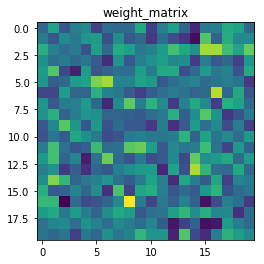

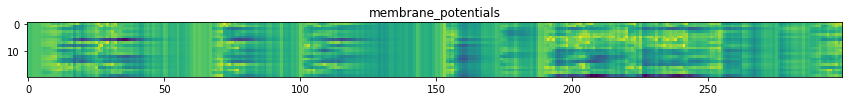

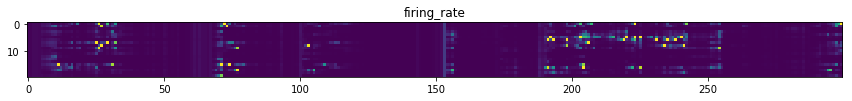

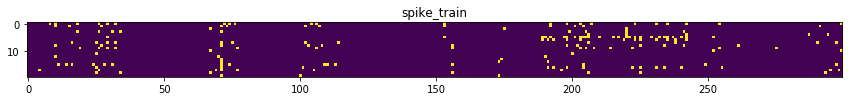

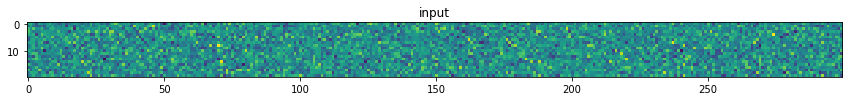

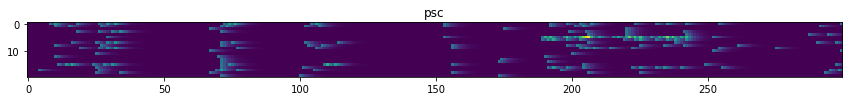

In [48]:
a = recurrent_network(param)
temp_mem = np.zeros(a.neuron_num)
temp_psc = np.zeros(a.neuron_num)
for t in range(a.time_steps):
    temp_mem = temp_mem*a.mem_decay + np.matmul(a.input[:,t].T,a.input_weight) + np.matmul(temp_psc.T, a.weight_matrix)
    a.membrane_potentials[:,t] = temp_mem.copy()
    a.firing_rate[:,t] = a.rho_0 * np.exp((a.membrane_potentials[:,t]-a.threshold)/a.delta_mem)
    prob = np.random.uniform(size=20)
    a.spike_train[:,t] = (a.firing_rate[:,t] > prob)
    a.psc[:,t] = temp_psc * a.psc_decay + 1/a.tau_psc * a.spike_train[:,t]
    temp_psc = a.psc[:,t]
    temp_mem *= (1-a.spike_train[:,t])
a.plot()

(-2, 2)

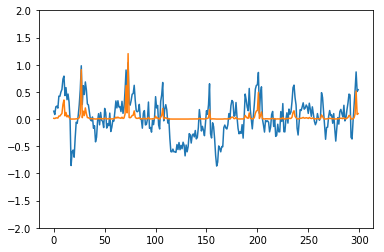

In [49]:
plt.plot(a.membrane_potentials[1])
# plt.plot(a.rho_0 * np.exp(a.membrane_potentials[0]))
# plt.plot(a.spike_train[0])
# plt.plot(a.psc[0])
plt.plot(a.firing_rate[1])
plt.ylim(-2,2)

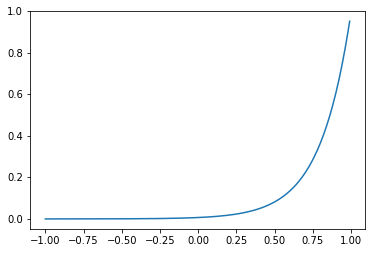

In [180]:
x=np.arange(-1,1,0.01)
y=np.exp((x-1)/0.2)
plt.plot(x,y)